In [1]:
%matplotlib inline
from obspy import read, UTCDateTime as UTC
from obspy.signal.cross_correlation import correlation_detector
%matplotlib inline
import obspy
import io
import matplotlib.pyplot as plt
import helpers
import numpy as np
import pandas as pd

from obspy.signal import trigger
from obspy.signal import filter

# template = read('https://examples.obspy.org/IC.MDJ.2013.043.mseed')
# template.filter('bandpass', freqmin=0.5, freqmax=2)
# template.plot()

In [2]:
paths = [
'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.2019.138',
#     '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.02.GDH.2019.138',
# '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.03.GDH.2019.138',
# '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.04.GDH.2019.138',
# '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.05.GDH.2019.138',
# '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.06.GDH.2019.138'
]
stream_b00 = obspy.read(paths[0])
for p in paths[1:]:
    stream_b00 = stream_b00 + obspy.read(p)

# this action destroys the raw data
# the wires were crossed on the hydrophone this fixes it
# stream_b00[3].data = stream_b00[3].data.max() - stream_b00[3].data
try:
    stream_b00[3].data = -1 * stream_b00[3].data
except IndexError:
    print('there isnt that many hydrophones in the data set')
    
# this action destroys raw data and only demeaned data is left
stream_b00.detrend('demean')

# this action destroys raw data and only normalized data is left
stream_b00.normalize()

# perform a highpass filter at 5Hz on the data
for t in stream_b00:
    t.data = filter.highpass(t, freq=5, df=1000)

there isnt that many hydrophones in the data set


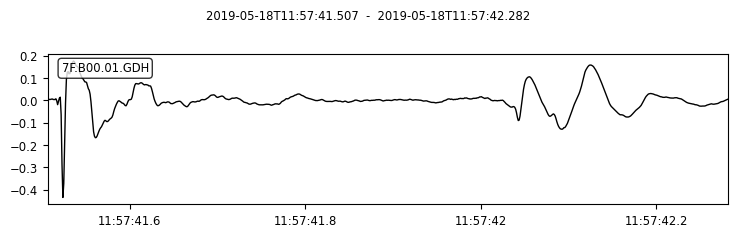

In [3]:
template = stream_b00.copy()
pick = UTC('2019-05-18T11:57:41.532000Z')
template = template.trim(pick-0.025, pick+0.75)
_ = template.plot()
template_tr = template[0].copy()

In [4]:
stream_b00[0]

7F.B00.01.GDH | 2019-05-18T00:00:02.907000Z - 2019-05-19T00:00:01.019000Z | 1000.0 Hz, 86398113 samples

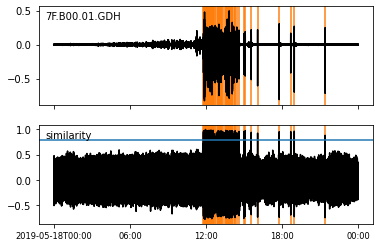

In [7]:
height = 0.8
distance = 3
#these should both be streams not traces
detections, sims = correlation_detector(stream=stream_b00
                                        , templates=template
                                        , heights=height
                                        , distance=distance
                                        , plot=stream_b00)

In [10]:
detections

[{'time': 2019-05-18T11:47:54.445000Z,
  'similarity': 0.95854409279428598,
  'template_id': 0},
 {'time': 2019-05-18T11:49:19.028000Z,
  'similarity': 0.9333830706276478,
  'template_id': 0},
 {'time': 2019-05-18T11:49:27.497000Z,
  'similarity': 0.95776620346143393,
  'template_id': 0},
 {'time': 2019-05-18T11:49:32.920000Z,
  'similarity': 0.94668171095793707,
  'template_id': 0},
 {'time': 2019-05-18T11:49:36.815000Z,
  'similarity': 0.96740701617688063,
  'template_id': 0},
 {'time': 2019-05-18T11:49:41.575000Z,
  'similarity': 0.94957069539026095,
  'template_id': 0},
 {'time': 2019-05-18T11:49:45.469000Z,
  'similarity': 0.94879703068426435,
  'template_id': 0},
 {'time': 2019-05-18T11:49:50.387000Z,
  'similarity': 0.95797791348911654,
  'template_id': 0},
 {'time': 2019-05-18T11:49:54.391000Z,
  'similarity': 0.97417560518727386,
  'template_id': 0},
 {'time': 2019-05-18T11:49:57.611000Z,
  'similarity': 0.89488726278219255,
  'template_id': 0},
 {'time': 2019-05-18T11:50:02.6